<a href="https://colab.research.google.com/github/BikramKC7/Data-Visualization/blob/main/BikramKC_0355714_MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the goodle drive to access the content of my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#setting up the api token of the kaglle to direclty donwload the datasets from kaggle
# !mkdir -p ~/.kaggle
# !cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading the datasets from kaggle to the drive
# !kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [ ]:
#importing the necessary libraries for the data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = '/content/drive/MyDrive/DatasetII/IMDB dataset link.csv'
df = pd.read_csv(data_path)

**Dataset Evaluation**

In [ ]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


Findigs

1. There are 1000 entries in this column
2. The average value is 7.95, suggesting most of the data clusters around this point.
3. A standard deviation of 0.28 indicates the values don't vary much from the mean — the data is tightly grouped.
4. The lowest recorded value is 7.60.
5. 25% of the values are below 7.70.
6. The median is 7.90, meaning half of the data is below and half is above this value.
7. 75% of values are below 8.10.
8. The highest value is 9.30. No values exceed this.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


<Axes: >

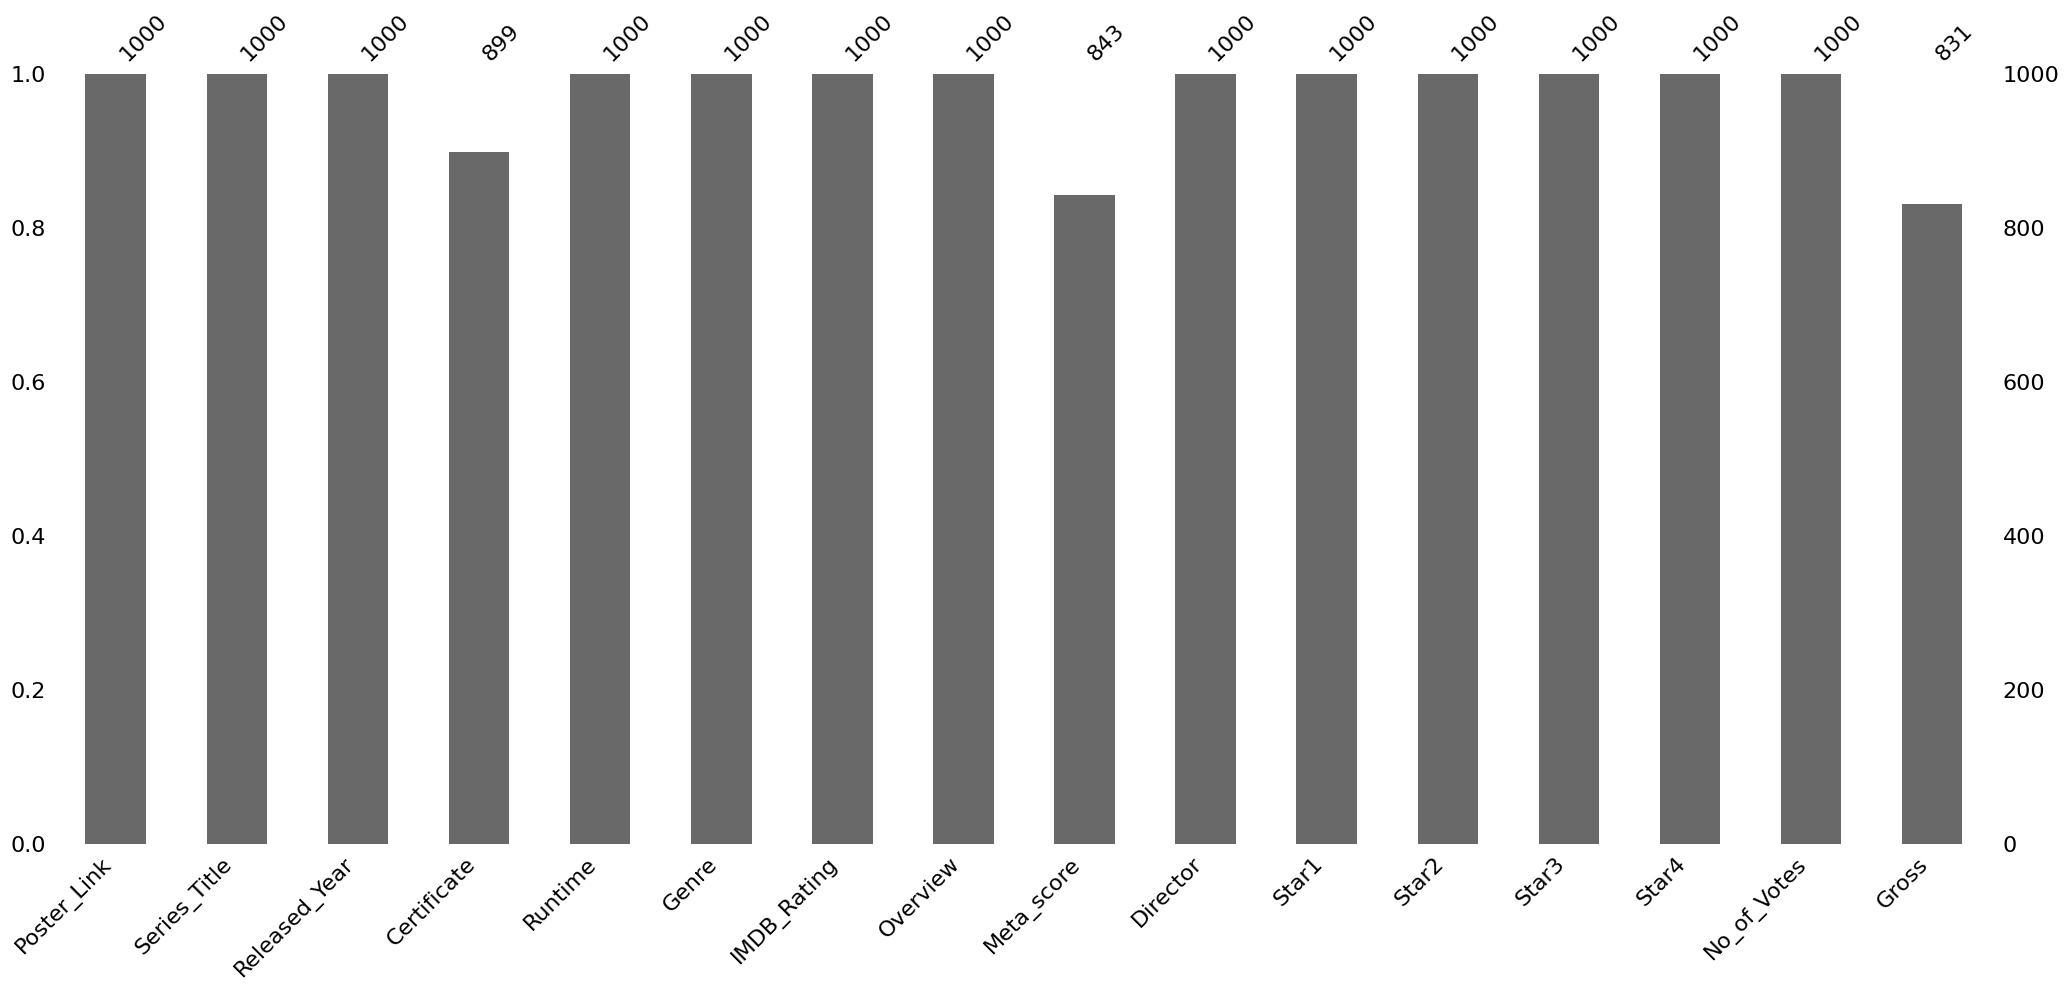

In [ ]:
import missingno as mn
mn.bar(df)

**Data Cleaning and Manupulation**

In [ ]:
#dropping the poster link column and overview column since they donnot contribute much in data visualization
df.drop(['Poster_Link', 'Overview'],axis=1,inplace=True)


In [ ]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1965', '1962', '1959', '1958', '1952', '1944',
       '1941', '2013', '2007', '2005', '1989', '1963', '1950', '1948',
       '2015', '1996', '1982', '1978', '1967', '1951', '1949', '1940',
       '1939', '1934', '1970', '1969', '1961', '1946', '1930', '1938',
       '1933', 'PG', '1953'], dtype=object)

In [ ]:
#while checking the unique values in Column 'Release_Year' found out one of the row contain non-integer value so , got removed it
df = df[df['Released_Year'] != 'PG']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   713 non-null    object 
 1   Released_Year  713 non-null    object 
 2   Certificate    713 non-null    object 
 3   Runtime        713 non-null    object 
 4   Genre          713 non-null    object 
 5   IMDB_Rating    713 non-null    float64
 6   Meta_score     713 non-null    float64
 7   Director       713 non-null    object 
 8   Star1          713 non-null    object 
 9   Star2          713 non-null    object 
 10  Star3          713 non-null    object 
 11  Star4          713 non-null    object 
 12  No_of_Votes    713 non-null    int64  
 13  Gross          713 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 99.7+ KB


In [ ]:
df['Released_Year'] = pd.to_datetime(df['Released_Year'])

# Ensure Runtime column is string type, then remove ' min' and convert to numeric
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce').astype('Int64')

# For Gross, similarly convert to string, remove commas, convert to numeric
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce').astype('Int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Series_Title   999 non-null    object        
 1   Released_Year  999 non-null    datetime64[ns]
 2   Certificate    898 non-null    object        
 3   Runtime        999 non-null    float64       
 4   Genre          999 non-null    object        
 5   IMDB_Rating    999 non-null    float64       
 6   Meta_score     842 non-null    float64       
 7   Director       999 non-null    object        
 8   Star1          999 non-null    object        
 9   Star2          999 non-null    object        
 10  Star3          999 non-null    object        
 11  Star4          999 non-null    object        
 12  No_of_Votes    999 non-null    int64         
 13  Gross          830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 117.1+ KB


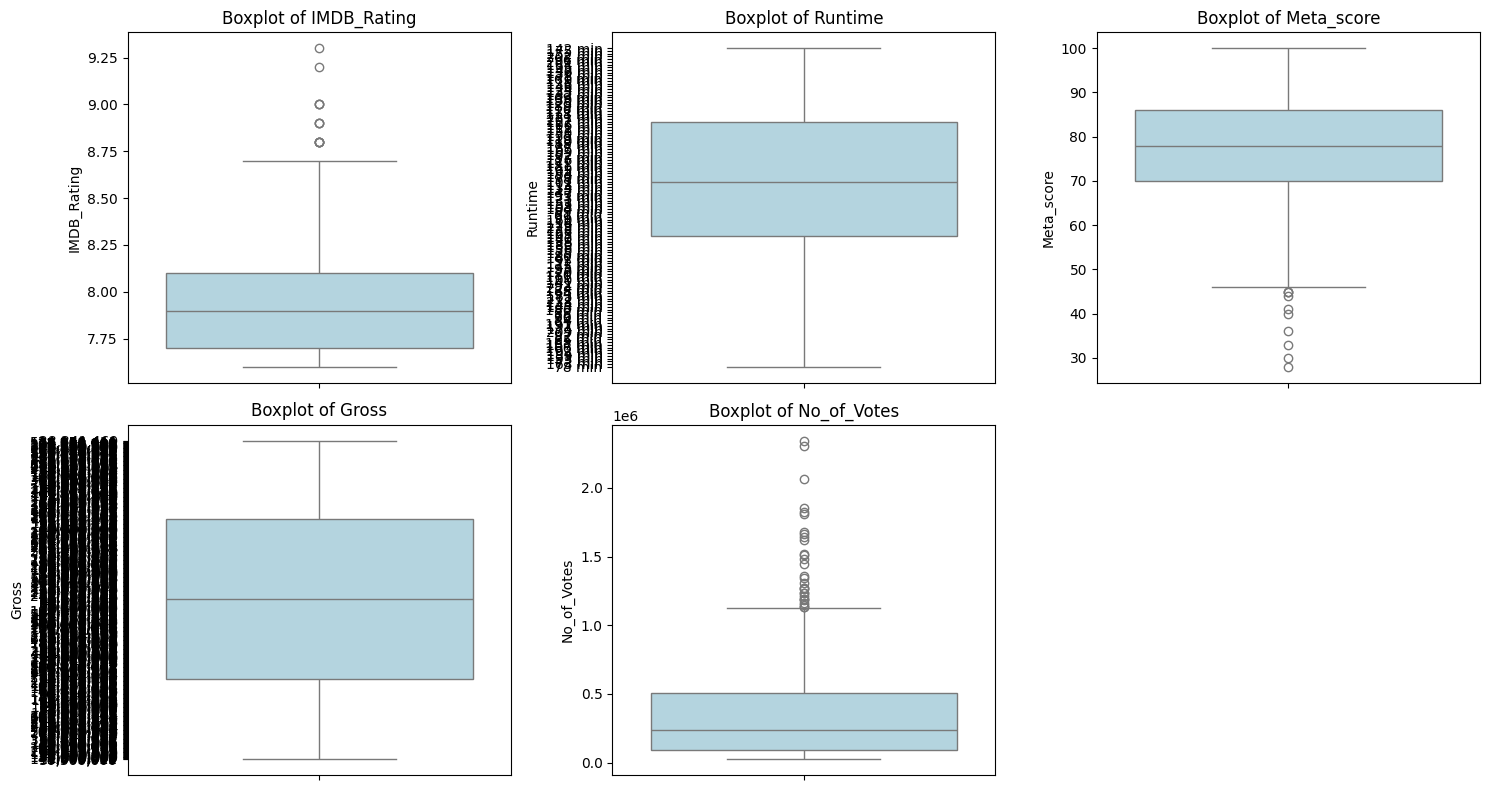

In [ ]:
# List of numerical columns
num_cols = ['IMDB_Rating', 'Runtime', 'Meta_score', 'Gross', 'No_of_Votes']

# Plotting boxplots to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:


# Remove commas and convert to float
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce')

print("\n'Runtime' cleaned to integer.")


'Runtime' cleaned to integer.


In [ ]:
df.head()

In [ ]:
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
df.dropna(subset=['Gross'], inplace=True)
print("\nMissing values handled for 'Certificate', 'Meta_score', and 'Gross'.")

In [ ]:
df.head()

In [ ]:
df.drop_duplicates(subset=['Series_Title', 'Released_Year'], keep='first', inplace=True)
print("\nDuplicate rows handled.")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['Genre'].str.split(',')

In [ ]:
genres_list = []
for genres in list(df['Genre'].str.split(',')):
    for genre in genres:
        genres_list.append(genre)
cleaned_genres = [genre.strip() for genre in genres_list]  # Removing leading/trailing spaces

genre_counts = {}
for genre in cleaned_genres:
    if genre not in genre_counts:
        genre_counts[genre]=1
    else:
        genre_counts[genre] = genre_counts[genre] + 1
genre_counts

In [ ]:
# Reverse sort dictionary based on values
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Print the sorted dictionary
print(sorted_genre_counts)

In [ ]:
df.head()

In [ ]:
# Counting the most frequent genres
plt.figure(figsize=(12, 6))
plt.bar(list(sorted_genre_counts.keys()), list(sorted_genre_counts.values()), color='skyblue', edgecolor='black')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Distribution of movie certificates
plt.figure(figsize=(10, 6))
df['Certificate'].value_counts().plot(kind='bar', color='slateblue')
plt.title('Distribution of Movie Certificates')
plt.xlabel('Certificate')
plt.ylabel('Number of Movies')
plt.show()

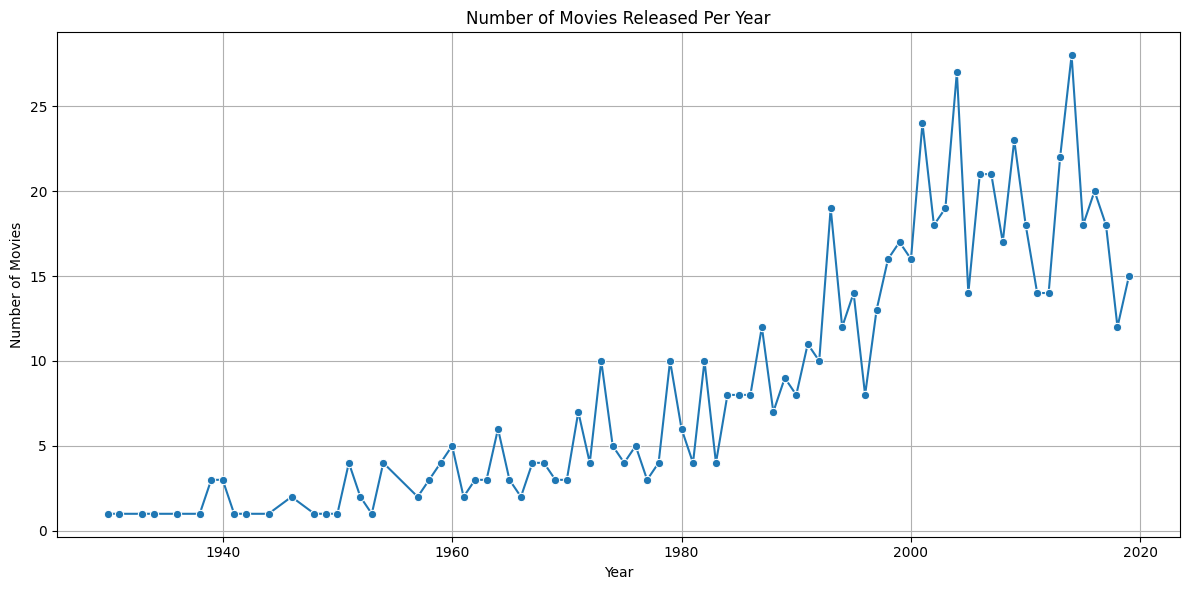

In [ ]:
# Step 1: Extract the year from the datetime column
df['Year'] = df['Released_Year'].dt.year

# Step 2: Count the number of movies per year
movies_per_year = df['Year'].value_counts().sort_index()

# Step 3: Plotting — Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Analysis of Gross vs Directors

plt.figure(figsize=(15,6))

# Top 10 directors by total Gross
top_directors = df.groupby('Director')['Gross'].sum().sort_values(ascending=False).head(10).index

# Add Gross in millions
df['Gross_Million'] = df['Gross'] / 1_000_000

# Filter data
plot_data = df[df['Director'].isin(top_directors)]

# Create the barplot
ax = sns.barplot(x='Director', y='Gross_Million', data=plot_data, estimator=sum, ci=None, palette="viridis")

# Annotate values on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X coordinate (center of bar)
        height + 1,                      # Y coordinate (a little above the bar)
        f'{height:.1f}M',                # Text label
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.xticks(rotation=45)
plt.ylabel('Gross (in Millions)')
plt.title('Top 10 Directors by Total Gross')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [ ]:
# Combine all stars into one column
stars_combined = pd.concat([
    df[['Star1', 'Gross']],
    df[['Star2', 'Gross']],
    df[['Star3', 'Gross']],
    df[['Star4', 'Gross']]
])

# Group by star and sum the Gross
stars_combined['Gross'] = pd.to_numeric(stars_combined['Gross'], errors='coerce')
stars_combined.dropna(subset=['Gross'], inplace=True)
star_gross = stars_combined.groupby('Star1')['Gross'].sum().sort_values(ascending=False).head(10)

# Prepare data for plotting
star_gross_million = star_gross / 1_000_000

# Plotting
plt.figure(figsize=(15,6))
ax = sns.barplot(x=star_gross_million.index, y=star_gross_million.values, palette="magma")

# Annotate bars
for i, value in enumerate(star_gross_million.values):
    ax.text(i, value + 5, f'{value:.1f}M', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.ylabel('Gross (in Millions)')
plt.title('Top 10 Stars by Total Gross (All Star Columns Combined)')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,6))

# Top 10 directors by total number of votes
top_directors_votes = df.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(10).index

# Filter data
vote_data = df[df['Director'].isin(top_directors_votes)]

# Create the barplot
ax = sns.barplot(x='Director', y='No_of_Votes', data=vote_data, estimator=sum, ci=None, palette='plasma')

# Annotate values on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1_000,
        f'{int(height):,}',
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.xticks(rotation=45)
plt.ylabel('Total Number of Votes')
plt.title('Top 10 Directors by Total Number of Votes')
plt.tight_layout()
plt.show()

In [ ]:
# Counting movies per director
director_counts = df['Director'].value_counts().head(15)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')
plt.title('Top 15 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [ ]:
df.head()

In [ ]:
# Combining all actor columns into a single list
from collections import Counter

actors = pd.Series(df[['Star1', 'Star2', 'Star3', 'Star4']].values.ravel())
top_actors = actors.value_counts().head(20)

# Plotting most frequent actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title('Top 20 Most Frequent Actors')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

In [ ]:
top_5_gross_movies = df.nlargest(5, 'Gross')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_gross_movies['Gross'] / 1e6, y=top_5_gross_movies['Series_Title'], palette='magma')
plt.title('Top 5 Movies by Gross Revenue')
plt.xlabel('Gross Revenue (Millions USD)')
plt.ylabel('Movie Title')
for index, value in enumerate(top_5_gross_movies['Gross'] / 1e6):
    plt.text(value + 1, index, f' ${value:,.0f}M', va='center', fontsize=9)
plt.xlim(0, (top_5_gross_movies['Gross'].max() / 1e6) * 1.18)
plt.show()

In [ ]:
# Top 10 movies by IMDb rating
top_rated_movies = df.nlargest(10, 'IMDB_Rating')

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_rated_movies, x='IMDB_Rating', y='Series_Title', palette='viridis')
plt.title('Top 10 Movies by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')

# Annotate each bar with the rating value
for index, value in enumerate(top_rated_movies['IMDB_Rating']):
    plt.text(value + 0.05, index, f'{value:.1f}', va='center')

plt.tight_layout()
plt.show()

**Count how many times each unique genre combination occurs**

In [ ]:
from collections import Counter

# Sample input: df['Genre'] contains comma-separated genre strings
# Step 1: Clean and convert each genre string to a sorted tuple
genre_combinations = df['Genre'].dropna().apply(lambda x: tuple(sorted([g.strip() for g in x.split(',')])))

# Step 2: Count occurrences of each genre combination
combination_counts = Counter(genre_combinations)

# Step 3: Convert to DataFrame for easy display and sorting
combo_df = pd.DataFrame(combination_counts.items(), columns=['Genre_Combination', 'Count'])
combo_df = combo_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Step 4: Display top N combinations
print(combo_df.head(10))  # Change number for more

In [ ]:
# Top 10 genre combinations for pie chart
top_n = 10
top_combos = combo_df.head(top_n)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_combos['Count'], labels=[', '.join(combo) for combo in top_combos['Genre_Combination']],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Genre Combinations (Pie Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
import itertools
# Threshold for good gross earnings (e.g., 100 million)
gross_threshold = 100_000_000

# Create actor combinations as sorted tuples to have consistent combos
df['Actor_Combination'] = df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: tuple(sorted(x)), axis=1)

# Filter movies with gross above the threshold
good_gross_df = df[df['Gross'] >= gross_threshold]

# Extract all actor pairs from each movie’s actor combination
pair_list = []
for actors in good_gross_df['Actor_Combination']:
    # Create all unique pairs (combinations of 2)
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            pair_list.append((actors[i], actors[j]))

# Create a DataFrame of pairs
pair_df = pd.DataFrame(pair_list, columns=['Actor1', 'Actor2'])

# Count how many times each pair appears
pair_counts = pair_df.value_counts().reset_index(name='Count')

# Pivot to create matrix for heatmap (actors on both axes)
heatmap_data = pair_counts.pivot(index='Actor1', columns='Actor2', values='Count').fillna(0)

# Make heatmap_data symmetric by adding its transpose (for pairs appearing in either order)
heatmap_data = heatmap_data.add(heatmap_data.T, fill_value=0)

# Find actors present in both index and columns
common_actors = heatmap_data.index.intersection(heatmap_data.columns)

# Select top actors by total pair counts
actor_sums = heatmap_data.loc[common_actors, common_actors].sum(axis=1)
top_actors = actor_sums.sort_values(ascending=False).head(15).index

# Subset the heatmap data to top actors only
heatmap_data_subset = heatmap_data.loc[top_actors, top_actors]

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data_subset, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Actor Pairs in Movies with Gross >= 100 Million')
plt.xlabel('Actor 2')
plt.ylabel('Actor 1')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df_cleaned = df.copy()

In [ ]:
yearly_gross = df_cleaned.groupby('Year')['Gross'].sum().reset_index()

# Convert Gross to millions for easier reading
yearly_gross['Gross_Million'] = yearly_gross['Gross'] / 1_000_000

plt.figure(figsize=(14,7))
sns.barplot(data=yearly_gross, x='Year', y='Gross_Million', color='skyblue')
plt.title('Total Gross Earnings by Year (in Millions)')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings (Million USD)')

# Set ticks and labels every 5 years, making sure ticks and labels match
step = 5
ticks = list(range(0, len(yearly_gross), step))
labels = yearly_gross['Year'].iloc[ticks]

plt.xticks(ticks=ticks, labels=labels, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Replace missing values with 'Unknown' for clarity
df_cleaned['Certificate'] = df_cleaned['Certificate'].fillna('Unknown')

# Count each certificate
certificate_counts = df_cleaned['Certificate'].value_counts().reset_index()
certificate_counts.columns = ['Certificate', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=certificate_counts, x='Certificate', y='Count', palette='viridis')

plt.title('Distribution of Movie Certificates')
plt.xlabel('Certificate')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Remove or convert invalid/missing runtimes
df_cleaned['Runtime'] = pd.to_numeric(df_cleaned['Runtime'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Runtime'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Runtime'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

In [ ]:
# Plot without log scale
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='No_of_Votes', y='Gross', data=df)
plt.title('Original Scale')
plt.xlabel('No_of_Votes')
plt.ylabel('Gross')

# Plot with log scale (log normalization)
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.log1p(df['No_of_Votes']), y=np.log1p(df['Gross']))
plt.title('Log Normalized Scale')
plt.xlabel('Log(No_of_Votes + 1)')
plt.ylabel('Log(Gross + 1)')

plt.tight_layout()
plt.show()